In [ ]:
# 데이터 변환을 통해 다시 시도

In [1]:
import pandas as pd
import numpy as np
# 파일 저장및 불러오기 모듈
import bz2
import pickle
import _pickle as cPickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
def decompress_pickle(file):
    data = bz2.BZ2File(file, 'rb')
    data = cPickle.load(data)
    return data
# 불러온 데이터는 전처리 완료된 데이터들이 분할된 형태
data = decompress_pickle('texi_train/adddate.pbz2')
data

,index,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,year,month,day,hour,distance,date
16973830,52263852,10.9,2011-01-13 11:20:00+00:00,-73.957230,40.768910,-73.977330,40.757120,2011,1,13,11,0.023303,4
50034343,43209749,10.5,2009-12-02 08:34:00+00:00,-73.982773,40.721264,-74.006119,40.705658,2009,12,2,8,0.028082,4
21507333,10798948,8.5,2010-08-19 09:59:00+00:00,-73.991150,40.755035,-73.995796,40.743389,2010,8,19,9,0.012539,5
21340781,10285876,17.0,2012-09-22 21:41:00+00:00,-73.955482,40.765823,-74.003212,40.732883,2012,9,22,21,0.057993,5
22732867,14570581,4.5,2011-07-31 21:35:00+00:00,-73.937157,40.797829,-73.948235,40.797256,2011,7,31,21,0.011093,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35781699,54747850,14.5,2010-05-08 00:31:00+00:00,-73.991417,40.685246,-73.985046,40.719112,2010,5,8,0,0.034461,7
24537187,20126125,7.5,2013-09-29 10:12:00+00:00,-73.988068,40.774788,-73.964958,40.769314,2013,9,29,10,0.023749,1
34836143,51836212,6.5,2011-01-07 15:31:00+00:00,-73.961243,40.765144,-73.975494,40.760227,2011,1,7,15,0.015076,5
40436048,13654877,13.5,2014-02-12 12:13:00+00:00,-73.789612,40.647606,-73.771423,40.659283,2014,2,12,12,0.021614,3


In [3]:
a = pd.get_dummies(data[["year",'month','hour','date']])
x_data =data[["pickup_longitude","pickup_latitude", "dropoff_longitude", "dropoff_latitude", "distance"]]
y_target = data["fare_amount"]
a[["pickup_longitude","pickup_latitude", "dropoff_longitude", "dropoff_latitude", "distance"]] = data[["pickup_longitude","pickup_latitude", "dropoff_longitude", "dropoff_latitude", "distance"]]
x_data = a

In [4]:
# x_data =data[["pickup_longitude","pickup_latitude", "dropoff_longitude", "dropoff_latitude", "year", "month", "hour", "distance"]]
# y_target = data["fare_amount"]

In [5]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_target, test_size=0.2, random_state=1)

lr_reg = LinearRegression()
lr_reg.fit(x_train, y_train)
pred = lr_reg.predict(x_test)
print(pred)

[13.06194168  8.96196421  7.26284625 ...  4.95891119  6.69604488
  5.45407089]


In [6]:
y_train = np.log1p(y_train)

In [27]:
y_target = np.log1p(y_target)

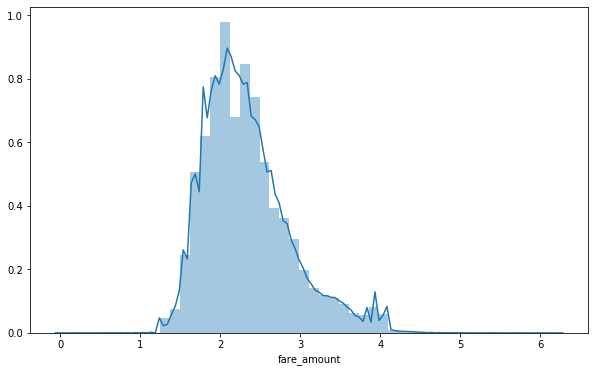

In [12]:
plt.figure(figsize=(10,6))
sns.distplot(y_train)


In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mae_val = mean_absolute_error(y_test, pred)
print("MAE: {0:.3F}".format(mae_val))
mse_val = mean_squared_error(y_test, pred)
print("MSE: {0:.3F}".format(mse_val))
rmse_val = np.sqrt(mse_val)
print("RMSE: {0: .3F}".format(rmse_val))

MAE: 2.219
MSE: 23.426
RMSE:  4.840


In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler , MinMaxScaler, PolynomialFeatures
# StandardScaler : 표준 정규분포
# MinMaxScaler : 최대값/최소값 정규화
# 로그 변환

In [7]:
# 기존 데이터 스케일 변환 시키는 함수
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data
        
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)
        
    return scaled_data

In [8]:
def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))
def evaluate_regr(y, pred):
#     rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y, pred)
#     rmsle_val = rmsle(y, pred)
    mae_val = mean_absolute_error(y, pred)
    print("RMSE : {0:.3F}, MAE : {1:.3F}, RMSLE: {2:.3F}".format(rmse_val, mae_val, rmsle_val))

In [11]:
def get_linear_reg_eval (model_name, params=None, x_data_n=None, y_target_n = None, verbose=True):
    coeff_df = pd.DataFrame()
    print("####",model_name,"####")
    # alpha 값을 바꿔가며 반복
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        elif model_name == 'Linear' : model = LinearRegression()
            
        x_train, x_test, y_train, y_test = train_test_split(x_data_n, y_target_n, test_size=0.3, random_state=1)
          
#         neg_mse_scores = cross_val_score(model, x_data_n, y_target_n, scoring="neg_mean_squared_error", cv=4)
#         avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
#         print("alpha {0} 의 5 folds의 평균 RMSE score:{1:.3f}".format(param, avg_rmse))
        # 모델 학습 시키기
        model.fit(x_train, y_train)        
        pred = model.predict(x_test)
#         evaluate_regr(np.expm1(y_test),np.expm1(pred))
        rmse = np.sqrt(y_test, pred)
        print('rmse:',rmse)
        coeff = pd.Series(data=model.coef_, index=x_data.columns)        
    return coeff_df
          

In [12]:
alphas = [0.1]
scale_methods = [(None, None),('Standard', None),('Standard', 2),('MinMax', None),('MinMax', 2)]  #,('Log', None)


for scale in scale_methods:
    x_data_scaled = get_scaled_data(method=scale[0], p_degree=scale[1], input_data=x_data)    
    print("\n 변환유형 :{0}, Degree : {1}".format(scale[0], scale[1]))
    get_linear_reg_eval('Linear', params=alphas, x_data_n = x_data_scaled, y_target_n=y_target, verbose=False)


 변환유형 :None, Degree : None
#### Linear ####
rmse: 23448123    2.915476
53515540    3.301515
34350215    3.316625
19719386    1.816590
15707714    2.774887
              ...   
6673919     2.645751
21625153    2.915476
22969383    3.962323
47504116    2.121320
36018700    5.000000
Name: fare_amount, Length: 1620000, dtype: float64

 변환유형 :Standard, Degree : None
#### Linear ####
rmse: 23448123    2.915476
53515540    3.301515
34350215    3.316625
19719386    1.816590
15707714    2.774887
              ...   
6673919     2.645751
21625153    2.915476
22969383    3.962323
47504116    2.121320
36018700    5.000000
Name: fare_amount, Length: 1620000, dtype: float64


MemoryError: Unable to allocate 64.2 GiB for an array with shape (5400000, 1595) and data type float64

In [33]:
alphas = [0.1]
scale_methods = [(None, None),('Standard', None),('Standard', 2),('MinMax', None),('MinMax', 2)]  #,('Log', None)


for scale in scale_methods:
    x_data_scaled = get_scaled_data(method=scale[0], p_degree=scale[1], input_data=x_data)    
    print("\n 변환유형 :{0}, Degree : {1}".format(scale[0], scale[1]))
    get_linear_reg_eval('Ridge', params=alphas, x_data_n = x_data_scaled, y_target_n=y_target, verbose=False)


 변환유형 :None, Degree : None
#### Ridge ####
rmse: 10.008179876567779

 변환유형 :Standard, Degree : None
#### Ridge ####
rmse: 10.009031466054553

 변환유형 :Standard, Degree : 2
#### Ridge ####
rmse: 4.844118768967771


ValueError: Length of passed values is 44, index implies 8.

In [13]:
alphas = [0.01 , 0.05, 0.1, 0.2]
for scale in scale_methods:
    x_data_scaled = get_scaled_data(method=scale[0], p_degree=scale[1], input_data=x_data)    
    print("\n 변환유형 :{0}, Degree : {1}".format(scale[0], scale[1]))
    get_linear_reg_eval('Lasso', params=alphas, x_data_n = x_data_scaled, y_target_n=y_target, verbose=False)


 변환유형 :None, Degree : None
#### Lasso ####
rmse: 23448123    2.915476
53515540    3.301515
34350215    3.316625
19719386    1.816590
15707714    2.774887
              ...   
6673919     2.645751
21625153    2.915476
22969383    3.962323
47504116    2.121320
36018700    5.000000
Name: fare_amount, Length: 1620000, dtype: float64
rmse: 23448123    2.915476
53515540    3.301515
34350215    3.316625
19719386    1.816590
15707714    2.774887
              ...   
6673919     2.645751
21625153    2.915476
22969383    3.962323
47504116    2.121320
36018700    5.000000
Name: fare_amount, Length: 1620000, dtype: float64
rmse: 23448123    2.915476
53515540    3.301515
34350215    3.316625
19719386    1.816590
15707714    2.774887
              ...   
6673919     2.645751
21625153    2.915476
22969383    3.962323
47504116    2.121320
36018700    5.000000
Name: fare_amount, Length: 1620000, dtype: float64
rmse: 23448123    2.915476
53515540    3.301515
34350215    3.316625
19719386    1.816590
15

MemoryError: Unable to allocate 64.2 GiB for an array with shape (5400000, 1595) and data type float64

In [35]:
alphas = [0.01 , 0.05, 0.1, 0.2]
for scale in scale_methods:
    x_data_scaled = get_scaled_data(method=scale[0], p_degree=scale[1], input_data=x_data)    
    print("\n 변환유형 :{0}, Degree : {1}".format(scale[0], scale[1]))
    get_linear_reg_eval('ElasticNet', params=alphas, x_data_n = x_data_scaled, y_target_n=y_target, verbose=False)


 변환유형 :None, Degree : None
#### ElasticNet ####
rmse: 8.856050260390042
rmse: 9.731776107883773
rmse: 9.750489754873628
rmse: 9.78740214810682

 변환유형 :Standard, Degree : None
#### ElasticNet ####
rmse: 9.010229718366672
rmse: 7.189570652064134
rmse: 6.103845131348407
rmse: 6.154315383863184

 변환유형 :Standard, Degree : 2
#### ElasticNet ####
rmse: 4.647852138869886


ValueError: Length of passed values is 44, index implies 8.